In [1]:
import numpy as np
import pandas as pd
from skimage import io
import cv2
import random
import os
import shutil

import matplotlib.pyplot as plt

In [2]:
train_data = pd.read_csv('archive/training.csv')
train_data.head()

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,...,nose_tip_x,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y
0,66.033564,39.002274,30.227008,36.421678,59.582075,39.647423,73.130346,39.969997,36.356571,37.389402,...,44.420571,57.066803,61.195308,79.970165,28.614496,77.388992,43.312602,72.935459,43.130707,84.485774
1,64.332936,34.970077,29.949277,33.448715,58.856170,35.274349,70.722723,36.187166,36.034723,34.361532,...,48.206298,55.660936,56.421447,76.352000,35.122383,76.047660,46.684596,70.266553,45.467915,85.480170
2,65.057053,34.909642,30.903789,34.909642,59.412000,36.320968,70.984421,36.320968,37.678105,36.320968,...,47.557263,53.538947,60.822947,73.014316,33.726316,72.732000,47.274947,70.191789,47.274947,78.659368
3,65.225739,37.261774,32.023096,37.261774,60.003339,39.127179,72.314713,38.380967,37.618643,38.754115,...,51.885078,54.166539,65.598887,72.703722,37.245496,74.195478,50.303165,70.091687,51.561183,78.268383
4,66.725301,39.621261,32.244810,38.042032,58.565890,39.621261,72.515926,39.884466,36.982380,39.094852,...,43.299534,64.889521,60.671411,77.523239,31.191755,76.997301,44.962748,73.707387,44.227141,86.871166


In [3]:
train_data.head()

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,...,nose_tip_x,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y
0,66.033564,39.002274,30.227008,36.421678,59.582075,39.647423,73.130346,39.969997,36.356571,37.389402,...,44.420571,57.066803,61.195308,79.970165,28.614496,77.388992,43.312602,72.935459,43.130707,84.485774
1,64.332936,34.970077,29.949277,33.448715,58.856170,35.274349,70.722723,36.187166,36.034723,34.361532,...,48.206298,55.660936,56.421447,76.352000,35.122383,76.047660,46.684596,70.266553,45.467915,85.480170
2,65.057053,34.909642,30.903789,34.909642,59.412000,36.320968,70.984421,36.320968,37.678105,36.320968,...,47.557263,53.538947,60.822947,73.014316,33.726316,72.732000,47.274947,70.191789,47.274947,78.659368
3,65.225739,37.261774,32.023096,37.261774,60.003339,39.127179,72.314713,38.380967,37.618643,38.754115,...,51.885078,54.166539,65.598887,72.703722,37.245496,74.195478,50.303165,70.091687,51.561183,78.268383
4,66.725301,39.621261,32.244810,38.042032,58.565890,39.621261,72.515926,39.884466,36.982380,39.094852,...,43.299534,64.889521,60.671411,77.523239,31.191755,76.997301,44.962748,73.707387,44.227141,86.871166


In [4]:
train_data.isna().sum()

left_eye_center_x              10
left_eye_center_y              10
right_eye_center_x             13
right_eye_center_y             13
left_eye_inner_corner_x      4778
left_eye_inner_corner_y      4778
left_eye_outer_corner_x      4782
left_eye_outer_corner_y      4782
right_eye_inner_corner_x     4781
right_eye_inner_corner_y     4781
right_eye_outer_corner_x     4781
right_eye_outer_corner_y     4781
left_eyebrow_inner_end_x     4779
left_eyebrow_inner_end_y     4779
left_eyebrow_outer_end_x     4824
left_eyebrow_outer_end_y     4824
right_eyebrow_inner_end_x    4779
right_eyebrow_inner_end_y    4779
right_eyebrow_outer_end_x    4813
right_eyebrow_outer_end_y    4813
nose_tip_x                      0
nose_tip_y                      0
mouth_left_corner_x          4780
mouth_left_corner_y          4780
mouth_right_corner_x         4779
mouth_right_corner_y         4779
mouth_center_top_lip_x       4774
mouth_center_top_lip_y       4774
mouth_center_bottom_lip_x      33
mouth_center_b

In [5]:
def get_non_null(dataset):
    '''
    this function removes the rows with null values
    '''
    dataset = dataset[np.sum(dataset.isna(), axis=1) == 0].reset_index()
    return dataset

In [6]:
def get_image_path(dataset):
    '''
    this function adds new column with the image path and returns the dataset after adding
    '''
    dataset['image_path'] = [str(x) + '.jpg' for x in range(dataset.shape[0])]
    train_images_path = 'archive/images/train_images/'
    dataset['image_path'] = (train_images_path + '/' + dataset['image_path'])
    return dataset

In [7]:
def get_classes_coord(dataset):
    '''
    this function merges the point x coordinate with y of the dataset and returns the dataset after merge
    '''
    col_points_x = [dataset.columns[i] for i in range(1, len(dataset.columns)-1, 2)]
    col_points_y = [dataset.columns[i] for i in range(2, len(dataset.columns)-1, 2)]
    new_cols_names = [col_points_x[i].split('_x')[0] for i in range(len(col_points_x))]
    for x in range(len(new_cols_names)):
        dataset[new_cols_names[x]] = [[dataset[col_points_x[x]][i], dataset[col_points_y[x]][i]] for i in range(len(dataset))]
    return pd.concat([dataset[new_cols_names], dataset['image_path']], axis=1) 

In [8]:
dataset_non_null   = get_non_null(train_data.copy())
# dataset_non_null.insert(1, 'class', 0)
# dataset_non_null.drop('index', axis = 1, inplace = True)
# dataset_non_null['class'] = np.uint8(dataset_non_null['class'])

dataset_with_paths = get_image_path(dataset_non_null.copy())
train_dataset      = get_classes_coord(dataset_with_paths)
train_dataset.head()

,left_eye_center,right_eye_center,left_eye_inner_corner,left_eye_outer_corner,right_eye_inner_corner,right_eye_outer_corner,left_eyebrow_inner_end,left_eyebrow_outer_end,right_eyebrow_inner_end,right_eyebrow_outer_end,nose_tip,mouth_left_corner,mouth_right_corner,mouth_center_top_lip,mouth_center_bottom_lip,image_path
0,"[66.0335639098, 39.0022736842]","[30.2270075188, 36.4216781955]","[59.582075188, 39.6474225564]","[73.1303458647, 39.9699969925]","[36.3565714286, 37.3894015038]","[23.4528721805, 37.3894015038]","[56.9532631579, 29.0336481203]","[80.2271278195, 32.2281383459]","[40.2276090226, 29.0023218045]","[16.3563789474, 29.6474706767]","[44.4205714286, 57.0668030075]","[61.1953082707, 79.9701654135]","[28.6144962406, 77.3889924812]","[43.3126015038, 72.9354586466]","[43.1307067669, 84.4857744361]",archive/images/train_images//0.jpg
1,"[64.3329361702, 34.9700765957]","[29.9492765957, 33.4487148936]","[58.8561702128, 35.2743489362]","[70.7227234043, 36.1871659574]","[36.0347234043, 34.3615319149]","[24.4725106383, 33.1444425532]","[53.9874042553, 28.2759489362]","[78.634212766, 30.4059234043]","[42.7288510638, 26.1460425532]","[16.8653617021, 27.0588595745]","[48.2062978723, 55.6609361702]","[56.4214468085, 76.352]","[35.1223829787, 76.0476595745]","[46.6845957447, 70.2665531915]","[45.4679148936, 85.4801702128]",archive/images/train_images//1.jpg
2,"[65.0570526316, 34.9096421053]","[30.9037894737, 34.9096421053]","[59.412, 36.3209684211]","[70.9844210526, 36.3209684211]","[37.6781052632, 36.3209684211]","[24.9764210526, 36.6032210526]","[55.7425263158, 27.5709473684]","[78.8873684211, 32.6516210526]","[42.1938947368, 28.1354526316]","[16.7911578947, 32.0871157895]","[47.5572631579, 53.5389473684]","[60.8229473684, 73.0143157895]","[33.7263157895, 72.732]","[47.2749473684, 70.1917894737]","[47.2749473684, 78.6593684211]",archive/images/train_images//2.jpg
3,"[65.2257391304, 37.261773913]","[32.0230956522, 37.261773913]","[60.0033391304, 39.1271791304]","[72.3147130435, 38.3809669565]","[37.6186434783, 38.7541147826]","[25.3072695652, 38.0079026087]","[56.4338086957, 30.9298643478]","[77.9102608696, 31.6657252174]","[41.6715130435, 31.0499895652]","[20.4580173913, 29.9093426087]","[51.8850782609, 54.1665391304]","[65.5988869565, 72.7037217391]","[37.2454956522, 74.1954782609]","[50.3031652174, 70.0916869565]","[51.5611826087, 78.2683826087]",archive/images/train_images//3.jpg
4,"[66.7253006135, 39.6212613497]","[32.244809816, 38.0420319018]","[58.5658895706, 39.6212613497]","[72.5159263804, 39.8844662577]","[36.9823803681, 39.0948515337]","[22.5061104294, 38.3052368098]","[57.2495705521, 30.6721766871]","[77.7629447853, 31.7372466258]","[38.0354355828, 30.9353815951]","[15.9258699387, 30.6721766871]","[43.2995337423, 64.8895214724]","[60.6714110429, 77.5232392638]","[31.1917546012, 76.9973006135]","[44.9627484663, 73.7073865031]","[44.2271411043, 86.8711656442]",archive/images/train_images//4.jpg


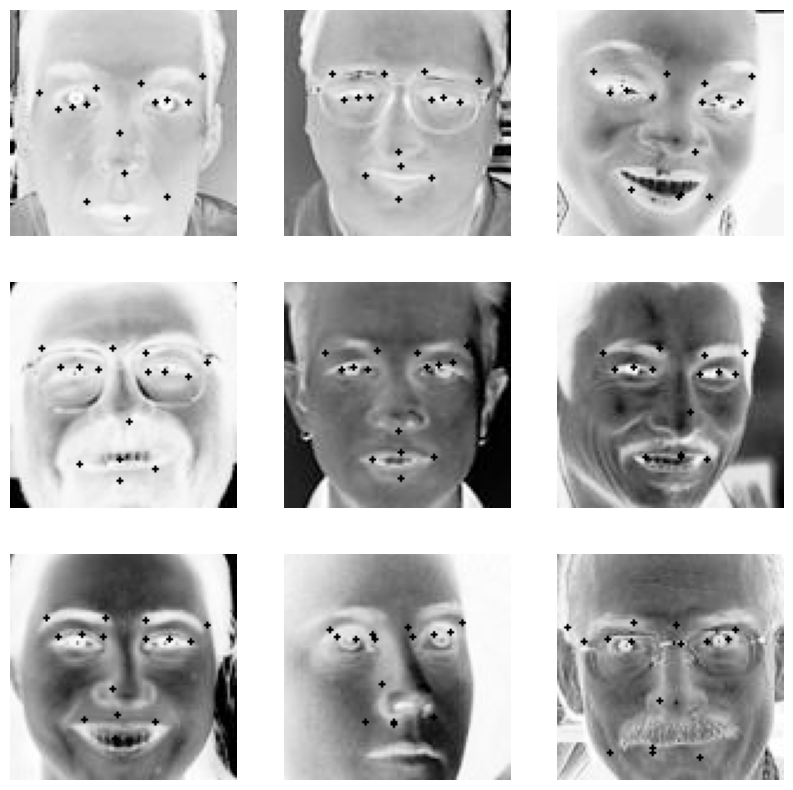

In [9]:
plt.figure(figsize = (10,10))
for plot_index in range(9):
    index  = random.randint(0, len(train_dataset) - 1)
    image  = io.imread(train_dataset['image_path'][index],1)
    points = train_dataset.loc[index][:-1]
    points = [np.uint(points[x]) for x in range(len(points))]
    for point_index in range(len(points)):
        image = cv2.circle(image, points[point_index] , radius=1, color=1, thickness=-1)
    plt.subplot(3,3, plot_index + 1)
    plt.imshow(image, cmap='Greys')
    plt.axis('off')

In [10]:
train_dataset.columns

Index(['left_eye_center', 'right_eye_center', 'left_eye_inner_corner',
       'left_eye_outer_corner', 'right_eye_inner_corner',
       'right_eye_outer_corner', 'left_eyebrow_inner_end',
       'left_eyebrow_outer_end', 'right_eyebrow_inner_end',
       'right_eyebrow_outer_end', 'nose_tip', 'mouth_left_corner',
       'mouth_right_corner', 'mouth_center_top_lip', 'mouth_center_bottom_lip',
       'image_path'],
      dtype='object')